# Data Description

#### Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.#### 

Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a str
oke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Exploratory Data Analysis

### 1.Analysis
 1. Univariate Analysis
 2. Bivariate Analysis

### 2.Feature Engineering
 1. Add new Features
 2. Modify Existing ones

### 3.Handling Outliers
 1. Detect Outliers
 2. Remove Outliers



In [2]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [175]:
df=pd.read_csv(r"C:\Users\Ayush Kumar Poddar\Downloads\healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [176]:
# Shape
df.shape

(5110, 12)

In [177]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [179]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: >

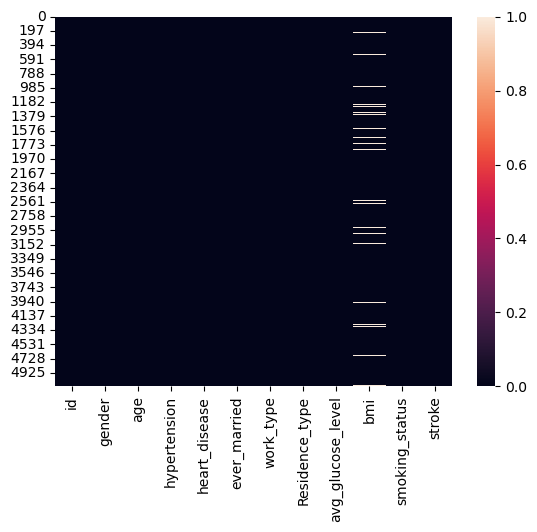

In [180]:
sns.heatmap(df.isnull())

In [183]:
df["bmi"].interpolate(method= "linear", inplace = True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [184]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.927280,7.775310,10.30,23.600,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [185]:
df.describe(include='object').T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


## Numerical Columns
  1. age
  2. bmi
  3. avg_glucose_level

## Categorical Columns
  1. hypertension
  2. heart_disease
  3. gender
  4. ever_married
  5. work_type
  6. Residence_type
  7. smoking_status

## Mixed Columns
  1. ID

## Data Visualization

### Univariate Analysis

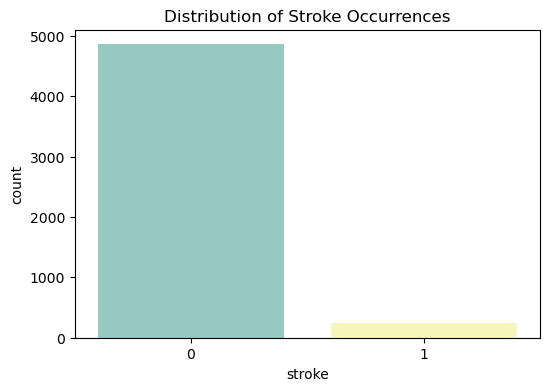

In [70]:
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df, palette='Set3')
plt.title('Distribution of Stroke Occurrences')
plt.show()

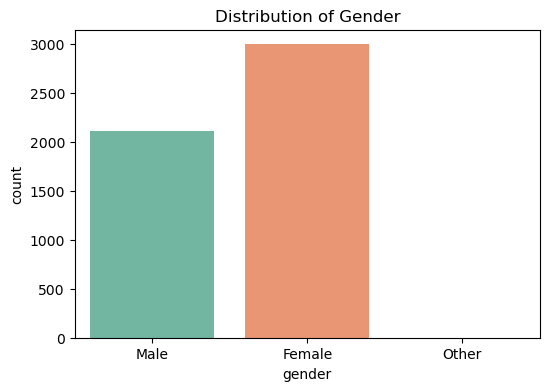

In [101]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df, palette='Set2')
plt.title('Distribution of Gender')
plt.show()

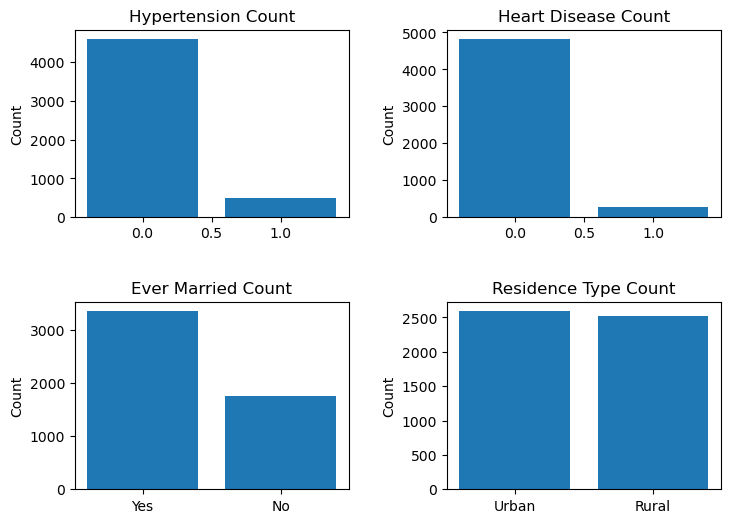

In [130]:
def plot_four_bar_charts(data1, data2, data3, data4,labels,titles):
    
    # Create a 2x2 grid for subplots
    fig, axs = plt.subplots(2, 2, figsize=(8, 6))
    fig.tight_layout(pad=4.0)  # Adjust the padding between plots
    
    datasets = [data1, data2, data3, data4]
    axes = axs.ravel()
    for i, ax in enumerate(axes):
        ax.bar(labels[i], datasets[i])
        ax.set_title(titles[i])
        ax.set_ylabel('Count')
    
    plt.show()
data1 = df['hypertension'].value_counts()
data2 = df['heart_disease'].value_counts()
data3 = df['ever_married'].value_counts()
data4 = df['Residence_type'].value_counts()

labels = [data1.index, data2.index, data3.index, data4.index]
titles = ['Hypertension Count', 'Heart Disease Count', 'Ever Married Count', 'Residence Type Count']

plot_four_bar_charts(data1, data2, data3, data4,labels,titles)

<Figure size 600x400 with 0 Axes>

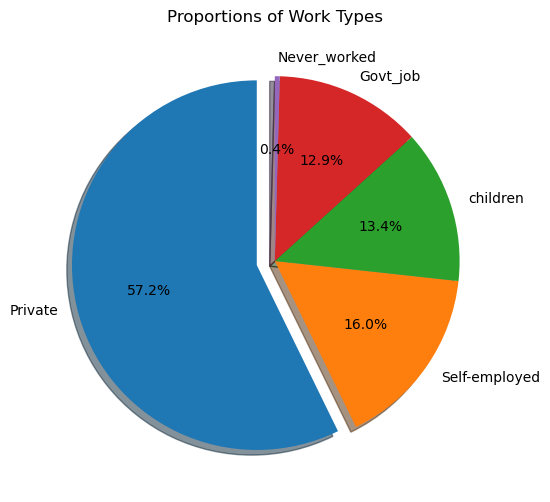

In [114]:
plt.figure(figsize=(6, 4))
count=df['work_type'].value_counts()
explode = [0.1 if i == 0 else 0 for i in range (len(count))]
plt.figure(figsize=(10,6))
plt.pie(count,labels=count.index,autopct='%1.1f%%', startangle=90,shadow=True,explode=explode)
plt.title('Proportions of Work Types')
plt.show()

### Bivariate Analysis

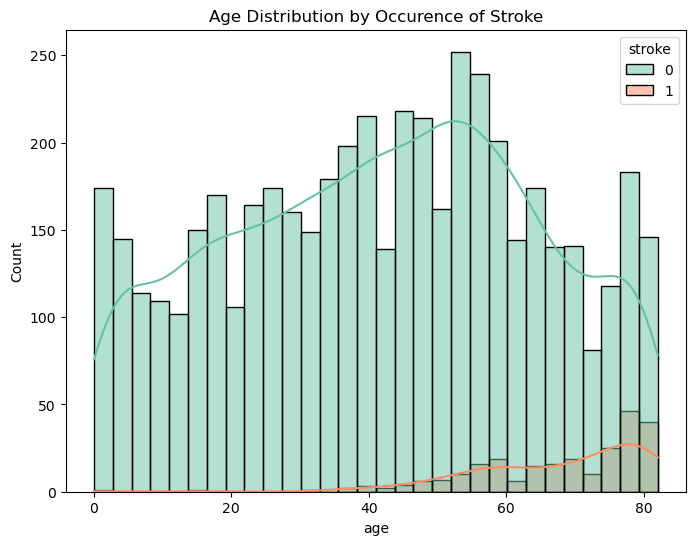

In [90]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='age', hue='stroke', kde=True, bins=30, palette='Set2')
plt.title("Age Distribution by Occurence of Stroke")
plt.show()

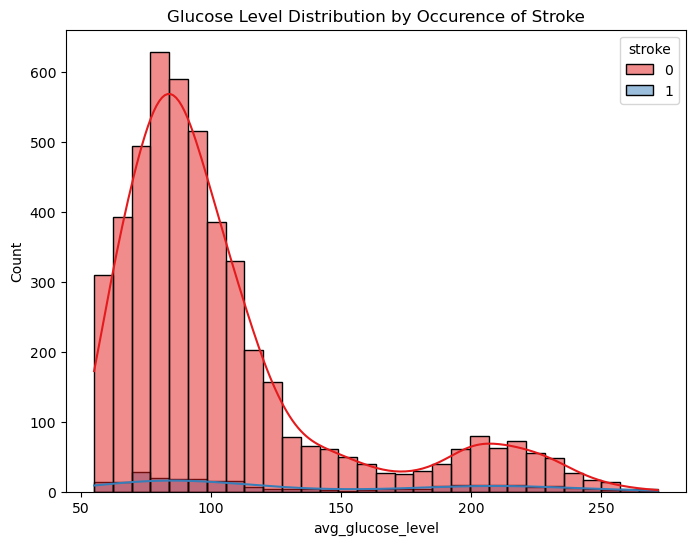

In [133]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='avg_glucose_level', hue='stroke', kde=True, bins=30, palette='Set1')
plt.title("Glucose Level Distribution by Occurence of Stroke")
plt.show()

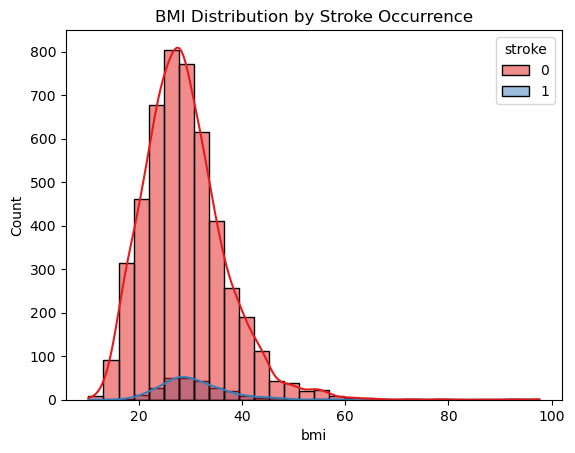

In [186]:
sns.histplot(data=df, x='bmi', hue='stroke', kde=True, bins=30, palette='Set1')
plt.title('BMI Distribution by Stroke Occurrence')
plt.show()

<Figure size 600x400 with 0 Axes>

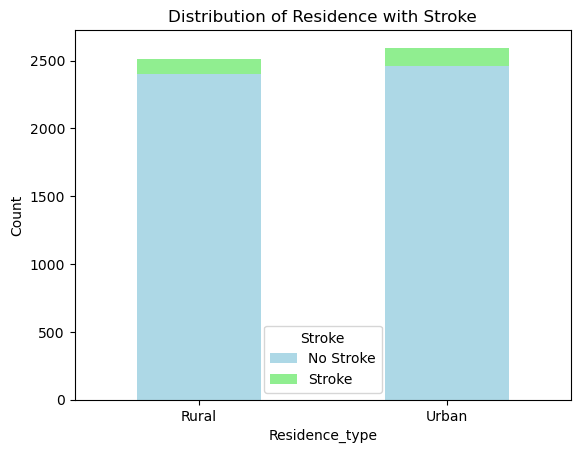

In [99]:
plt.figure(figsize=(6, 4))
plot_df = df.groupby(['Residence_type', 'stroke']).size().unstack(fill_value=0)

# Create a stacked bar chart
plot_df.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
plt.ylabel('Count')
plt.title('Distribution of Residence with Stroke')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

<Figure size 600x400 with 0 Axes>

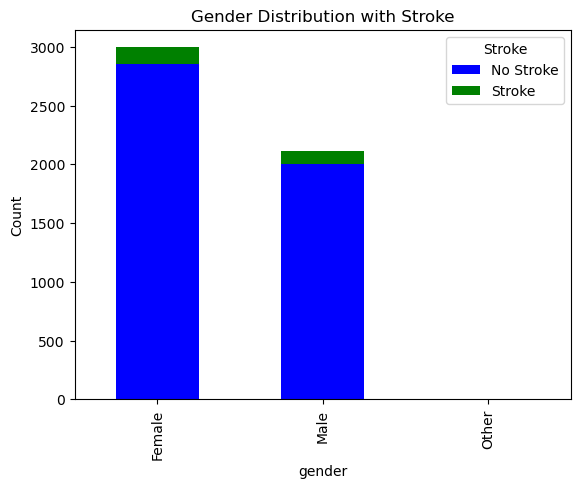

In [106]:
# Gender Distribution of the Data
plt.figure(figsize=(6, 4))
plot_df1 = df.groupby(['gender', 'stroke']).size().unstack(fill_value=0)

plot_df1.plot(kind='bar', stacked=True, color=['blue', 'green'])
plt.ylabel('Count')
plt.title('Gender Distribution with Stroke')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

<Figure size 600x400 with 0 Axes>

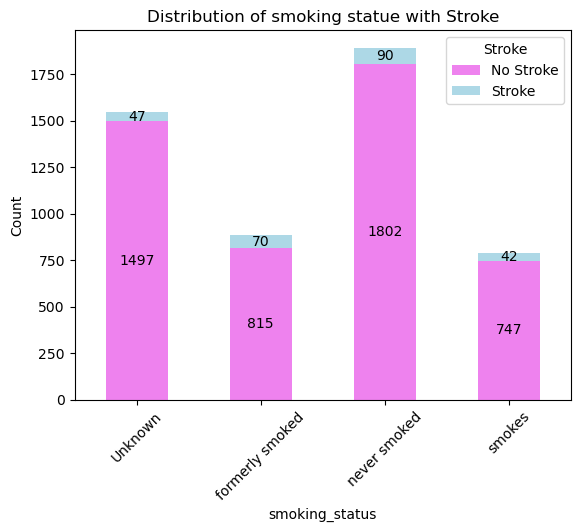

In [191]:
plt.figure(figsize=(6, 4))
plot_df2 = df.groupby(['smoking_status', 'stroke']).size().unstack(fill_value=0)

ax=plot_df2.plot(kind='bar', stacked=True, color=['violet', 'lightblue'])
for i in range(len(plot_df2)):
    for j in range(len(plot_df2.columns)):
        ax.text(i, plot_df2.iloc[i, :].cumsum()[j] - plot_df2.iloc[i, j] / 2, 
                f"{plot_df2.iloc[i, j]}", 
                ha='center', va='center', color='black')

plt.ylabel('Count')
plt.title('Distribution of smoking statue with Stroke')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()


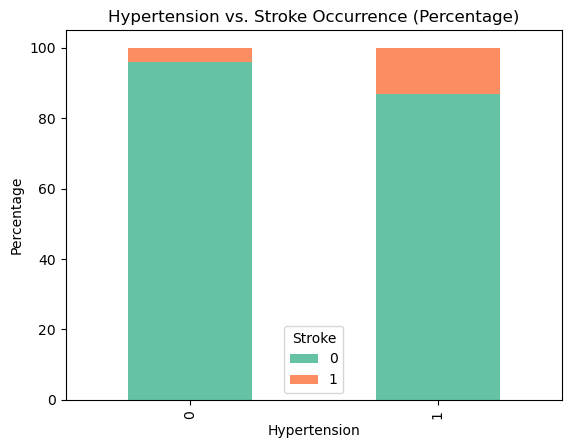

In [142]:
# Relationship between hypertesion and stroke
hypertension_stroke_counts = df.groupby(['hypertension', 'stroke']).size().unstack()
hypertension_totals = hypertension_stroke_counts.sum(axis=1)
hypertension_stroke_percent = hypertension_stroke_counts.div(hypertension_totals, axis=0) * 100

hypertension_stroke_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'))

plt.title('Hypertension vs. Stroke Occurrence (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Hypertension')
plt.legend(title='Stroke')
plt.show()

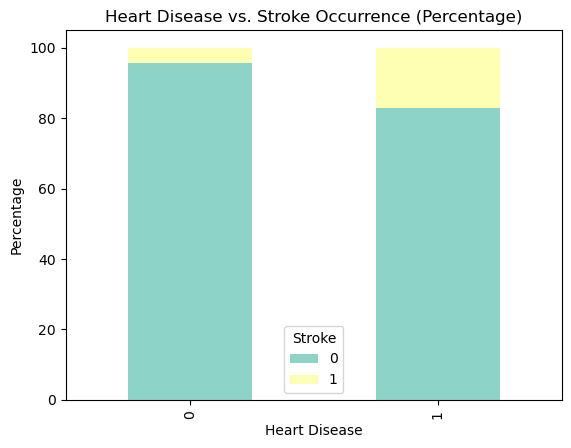

In [144]:
#How does heart disease relate to stroke
heart_disease_stroke_counts = df.groupby(['heart_disease', 'stroke']).size().unstack()
heart_disease_totals = heart_disease_stroke_counts.sum(axis=1)
heart_disease_stroke_percent = heart_disease_stroke_counts.div(heart_disease_totals, axis=0) * 100

heart_disease_stroke_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set3'))
plt.title('Heart Disease vs. Stroke Occurrence (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Heart Disease')
plt.legend(title='Stroke')
plt.show()

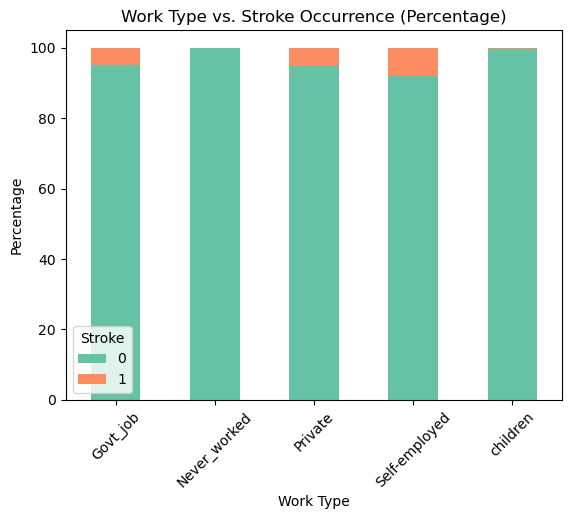

In [190]:
# How does the feature work_type affect the stroke 
work_type_stroke_counts = df.groupby(['work_type', 'stroke']).size().unstack()
work_type_totals = work_type_stroke_counts.sum(axis=1)
work_type_stroke_percent = work_type_stroke_counts.div(work_type_totals, axis=0) * 100

work_type_stroke_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'))

plt.title('Work Type vs. Stroke Occurrence (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Work Type')
plt.xticks(rotation=45)
plt.legend(title='Stroke')
plt.show()